In [206]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
food_train = pd.read_excel('/Users/Ganesh/Downloads/Participants-Data-20191108T095009Z-001/Participants Data/Data_train.xlsx')

In [208]:
food_train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [209]:
food_test = pd.read_excel('/Users/Ganesh/Downloads/Participants-Data-20191108T095009Z-001/Participants Data/Data_test.xlsx')

In [210]:
food_test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [211]:
food_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 780.1+ KB


In [212]:
food_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 8 columns):
Restaurant       2774 non-null object
Location         2774 non-null object
Cuisines         2774 non-null object
Average_Cost     2774 non-null object
Minimum_Order    2774 non-null object
Rating           2774 non-null object
Votes            2774 non-null object
Reviews          2774 non-null object
dtypes: object(8)
memory usage: 173.5+ KB


In [213]:
food_train.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [214]:
food_test.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
dtype: int64

So, there are no missing elements in the dataset

### Data Exploration

#### output variable

In [215]:
food_train['Delivery_Time'] = food_train['Delivery_Time'].apply(lambda x : int(x.split(' ')[0]))

In [216]:
food_train.shape

(11094, 9)

In [217]:
food_test.shape

(2774, 8)

In [218]:
ntrain = food_train.shape[0]
ntest = food_test.shape[0]
y_train = food_train.Delivery_Time.values
all_data = pd.concat((food_train, food_test)).reset_index(drop=True)
all_data.drop(['Delivery_Time'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (13868, 8)


E:\BIGDATA\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


In [219]:
all_data.head()

,Average_Cost,Cuisines,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
0,₹200,"Fast Food, Rolls, Burger, Salad, Wraps","FTI College, Law College Road, Pune",₹50,3.5,ID_6321,4,12
1,₹100,"Ice Cream, Desserts","Sector 3, Marathalli",₹50,3.5,ID_2882,4,11
2,₹150,"Italian, Street Food, Fast Food",Mumbai Central,₹50,3.6,ID_1595,30,99
3,₹250,"Mughlai, North Indian, Chinese","Sector 1, Noida",₹99,3.7,ID_5929,95,176
4,₹200,"Cafe, Beverages","Rmz Centennial, I Gate, Whitefield",₹99,3.2,ID_6123,235,521


In [220]:
#delete unwanted row
all_data[all_data['Average_Cost'].str.contains('for')]

,Average_Cost,Cuisines,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
6297,for,Fast Food,Pune University,₹50,NEW,ID_6472,-,-


We find that there is a wrong entry in the Average_cost column. We also noticed there are no values in the Rating, Votes, reviews. So we will delete this row.

In [221]:
all_data.drop([6297], inplace = True)

In [222]:
all_data[all_data['Average_Cost'].str.contains('for')]

,Average_Cost,Cuisines,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes


    #### 1.Average Cost

In [223]:
all_data['Average_Cost'] = all_data['Average_Cost'].apply(lambda x : (x.strip('₹'))).apply(lambda x:float(x.replace(',','')))

    #### 2. Minimum Order

In [224]:
all_data['Minimum_Order'] = all_data['Minimum_Order'].apply(lambda x : (x.strip('₹'))).apply(lambda x:float(x.replace(',','')))

    #### 3. Reviews

In [225]:
all_data[all_data['Reviews'] == '-']

,Average_Cost,Cuisines,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
12,150.0,"Burger, Fast Food, Desserts, Beverages","Sector 1, Noida",50.0,-,ID_1156,-,-
16,100.0,Italian,"Sector 1, Noida",50.0,-,ID_2141,-,-
18,150.0,"Kerala, Bihari",Pune University,50.0,-,ID_5262,-,-
25,100.0,"Desserts, Ice Cream","Mico Layout, Stage 2, BTM Layout,Bangalore",50.0,-,ID_4944,-,-
47,200.0,Chinese,"Mico Layout, Stage 2, BTM Layout,Bangalore",50.0,NEW,ID_2809,-,-
49,200.0,Lucknowi,Delhi University-GTB Nagar,50.0,-,ID_4866,-,-
61,100.0,"Bakery, Desserts, Fast Food","Sector 1, Noida",50.0,NEW,ID_294,-,-
71,150.0,"Chinese, Rolls","D-Block, Sector 63, Noida",50.0,-,ID_3309,-,-
75,100.0,"Fast Food, Bengali","Chandni Chowk, Kolkata",50.0,-,ID_3087,-,-
79,100.0,Rolls,"Sector 14, Noida",50.0,NEW,ID_6205,-,-


In [226]:
all_data['Reviews'] = all_data['Reviews'].apply(lambda x : x.replace('-','0') if x == '-' else x).apply(lambda x:int(x))

    #### 4. Cuisines

In [227]:
all_data = all_data.join(all_data['Cuisines'].str.get_dummies(sep=', '))

    #### 5. Location

In [228]:
all_data['City'] = all_data['Location'].apply(lambda x:x.split(',')[-1])

In [229]:
all_data = all_data.join(all_data['Location'].apply(lambda x:x.split(',')[:-1]).str.get_dummies(sep=', '))

In [230]:
all_data.head()

,Average_Cost,Cuisines,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes,Afghan,African,...,['Rmz Centennial',['Sandhurst Road'],['Sector 1'],['Sector 14'],['Sector 3'],['Sector 63A'],['Tejas Nagar Colony',['Tiretti'],['Yerawada',[]
0,200.0,"Fast Food, Rolls, Burger, Salad, Wraps","FTI College, Law College Road, Pune",50.0,3.5,ID_6321,4,12,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100.0,"Ice Cream, Desserts","Sector 3, Marathalli",50.0,3.5,ID_2882,4,11,0,0,...,0,0,0,0,1,0,0,0,0,0
2,150.0,"Italian, Street Food, Fast Food",Mumbai Central,50.0,3.6,ID_1595,30,99,0,0,...,0,0,0,0,0,0,0,0,0,1
3,250.0,"Mughlai, North Indian, Chinese","Sector 1, Noida",99.0,3.7,ID_5929,95,176,0,0,...,0,0,1,0,0,0,0,0,0,0
4,200.0,"Cafe, Beverages","Rmz Centennial, I Gate, Whitefield",99.0,3.2,ID_6123,235,521,0,0,...,1,0,0,0,0,0,0,0,0,0


In [231]:
#Drop the unncessary columns
drop_cols = ['Restaurant', 'Location', 'Cuisines']

for i in drop_cols:
    all_data.drop(i,axis=1,inplace=True)
    
all_data.head()

,Average_Cost,Minimum_Order,Rating,Reviews,Votes,Afghan,African,American,Andhra,Arabian,...,['Rmz Centennial',['Sandhurst Road'],['Sector 1'],['Sector 14'],['Sector 3'],['Sector 63A'],['Tejas Nagar Colony',['Tiretti'],['Yerawada',[]
0,200.0,50.0,3.5,4,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100.0,50.0,3.5,4,11,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,150.0,50.0,3.6,30,99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,250.0,99.0,3.7,95,176,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,200.0,99.0,3.2,235,521,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [232]:
# Categorical boolean mask
categorical_feature_mask = all_data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = all_data.columns[categorical_feature_mask].tolist()
categorical_cols

['Rating', 'Votes', 'City']

In [233]:
#Instantiate a LabelEncoder object:

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [234]:
#Apply LabelEncoder on each of the categorical columns:

# apply le on categorical feature columns
all_data[categorical_cols] = all_data[categorical_cols].apply(lambda col: le.fit_transform(col))

In [235]:
all_data.head()

,Average_Cost,Minimum_Order,Rating,Reviews,Votes,Afghan,African,American,Andhra,Arabian,...,['Rmz Centennial',['Sandhurst Road'],['Sector 1'],['Sector 14'],['Sector 3'],['Sector 63A'],['Tejas Nagar Colony',['Tiretti'],['Yerawada',[]
0,200.0,50.0,15,4,98,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100.0,50.0,15,4,46,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,150.0,50.0,16,30,1176,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,250.0,99.0,17,95,281,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,200.0,99.0,12,235,814,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### output variable

In [236]:
y_train

array([30, 30, 65, ..., 30, 30, 30], dtype=int64)

E:\BIGDATA\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


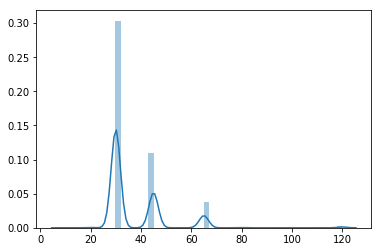

In [237]:
sns.distplot(y_train)

In [238]:
print(all_data.shape)

(13867, 152)


Getting the new train and test sets

In [239]:
food_train = all_data[:ntrain]
food_test = all_data[ntrain:]

In [240]:
food_train.shape, food_test.shape

((11094, 152), (2773, 152))

### Modelling

In [241]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

    #### Linear Regression

In [247]:
X = food_train
X_test = food_test
y = y_train

In [248]:
#Split the dataset

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [249]:
X_train.shape, X_val.shape,y_train.shape, y_val.shape

((8320, 152), (2774, 152), (8320,), (2774,))

In [250]:
## importing necessary models.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
## fit train and test data. 
lin_reg.fit(X_train, y_train)
## Predict test data. 
y_pred = lin_reg.predict(X_val)



In [251]:
y_pred

array([38.3125, 37.25  , 38.    , ..., 36.0625, 39.5   , 35.3125])

In [252]:
y_pred_test = lin_reg.predict(X_test)

In [253]:
y_pred_test

array([37.0625 , 35.59375, 34.46875, ..., 33.8125 , 43.     , 36.9375 ])

In [257]:
print ('%.2f'%mean_squared_error(y_val, y_pred))

110213956495508270215069696.00


In [258]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
lin_reg = LinearRegression()
cv = KFold(shuffle=True, random_state=2, n_splits=10)
scores = cross_val_score(lin_reg, X,y,cv = cv, scoring = 'neg_mean_absolute_error')

In [259]:
print ('%.8f'%scores.mean())

-9.01456189


In [242]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(food_train.values)
    rmse= np.sqrt(-cross_val_score(model, food_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

    #### Lasso

In [243]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [244]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 12.2729 (0.9974)



    #### ElasticNet

In [245]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [246]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 12.2686 (0.9961)



In [260]:
# Saving the predictions in excel file

result = pd.DataFrame(y_pred_test, columns = ['Delivery_Time'])
result.to_excel('Predict_Delivery_Time_Soln.xlsx', index = False)

In [261]:
result.head()

,Delivery_Time
0,37.06250
1,35.59375
2,34.46875
3,35.93750
4,34.93750
